<a href="https://colab.research.google.com/github/inuneko89/DADS_6003/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.ultimatepython.co/post/python-yahoo-finance

In [46]:
!pip install pandas
!pip install numpy
!pip install requests
!pip install lxml
!pip install yfinance


In [47]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install TA-Lib


--2024-02-19 12:15:26--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-02-19 12:15:27--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://deac-fra.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-02-19 12:15:27--  http://deac-fra.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving deac-fra.dl.s

In [48]:
pip install scikit-learn

In [89]:
import yfinance as yf

In [90]:
tesla = yf.Ticker('AAPL')
interval = '1h'
start = '2023-1-1'
end = '2023-12-31'
df = tesla.history(interval=interval,start=start,end=end)
df.drop(columns=['Volume', 'Dividends', 'Stock Splits'], inplace=True)
df

,Open,High,Low,Close
Datetime,,,,
2023-01-03 09:30:00-05:00,130.279999,130.899994,125.230003,125.459999
2023-01-03 10:30:00-05:00,125.459999,125.870003,124.730003,125.345001
2023-01-03 11:30:00-05:00,125.350197,125.370003,124.349098,124.660004
2023-01-03 12:30:00-05:00,124.660004,124.940002,124.190002,124.649902
2023-01-03 13:30:00-05:00,124.669899,125.000000,124.190002,124.570000
...,...,...,...,...
2023-12-29 11:30:00-05:00,191.964996,192.479996,191.725006,191.899994
2023-12-29 12:30:00-05:00,191.904999,192.229996,191.779999,191.899994
2023-12-29 13:30:00-05:00,191.904999,192.449997,191.899994,192.119995


In [91]:
import numpy as np
import pandas as pd

# Technical Indicators
import talib as ta

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score,train_test_split

# Data fetching
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()


In [92]:
df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod =10)
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)

X = df.iloc[:,:9]

In [93]:
X

,Open,High,Low,Close,S_10,Corr,RSI,Open-Close,Open-Open
Datetime,,,,,,,,,
2023-01-03 09:30:00-05:00,130.279999,130.899994,125.230003,125.459999,NaN,NaN,NaN,NaN,NaN
2023-01-03 10:30:00-05:00,125.459999,125.870003,124.730003,125.345001,NaN,NaN,NaN,0.000000,-4.820000
2023-01-03 11:30:00-05:00,125.350197,125.370003,124.349098,124.660004,NaN,NaN,NaN,0.005196,-0.109802
2023-01-03 12:30:00-05:00,124.660004,124.940002,124.190002,124.649902,NaN,NaN,NaN,0.000000,-0.690193
2023-01-03 13:30:00-05:00,124.669899,125.000000,124.190002,124.570000,NaN,NaN,NaN,0.019997,0.009895
...,...,...,...,...,...,...,...,...,...
2023-12-29 11:30:00-05:00,191.964996,192.479996,191.725006,191.899994,193.479910,-0.520149,31.683003,0.004990,-1.544998
2023-12-29 12:30:00-05:00,191.904999,192.229996,191.779999,191.899994,193.245000,-0.264303,31.683003,0.005005,-0.059998
2023-12-29 13:30:00-05:00,191.904999,192.449997,191.899994,192.119995,193.051999,0.092220,35.924842,0.005005,0.000000


In [94]:
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)

In [95]:
split = int(0.7*len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [96]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# ตรวจสอบและลบข้อมูลที่ไม่เหมาะสม
valid_indices = np.isfinite(X_train).all(axis=1) & np.isfinite(y_train)

X_train = X_train[valid_indices]
y_train = y_train[valid_indices]

# แบ่งข้อมูลเป็นชุด train และ test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# สร้างและฝึกโมเดล Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [97]:
probability = model.predict_proba(X_test)
probability

array([[0.46312585, 0.53687415],
       [0.43572322, 0.56427678],
       [0.41772207, 0.58227793],
       [0.48907153, 0.51092847],
       [0.44584037, 0.55415963],
       [0.48589179, 0.51410821],
       [0.4116127 , 0.5883873 ],
       [0.48900197, 0.51099803],
       [0.45081108, 0.54918892],
       [0.54640244, 0.45359756],
       [0.48610745, 0.51389255],
       [0.44065835, 0.55934165],
       [0.53507902, 0.46492098],
       [0.46826266, 0.53173734],
       [0.55718515, 0.44281485],
       [0.42851819, 0.57148181],
       [0.46630403, 0.53369597],
       [0.48983992, 0.51016008],
       [0.4770224 , 0.5229776 ],
       [0.50488988, 0.49511012],
       [0.45323421, 0.54676579],
       [0.51427037, 0.48572963],
       [0.46282621, 0.53717379],
       [0.45004975, 0.54995025],
       [0.52298625, 0.47701375],
       [0.48535635, 0.51464365],
       [0.46178881, 0.53821119],
       [0.47754489, 0.52245511],
       [0.4090857 , 0.5909143 ],
       [0.43657885, 0.56342115],
       [0.

In [98]:
probability = model.predict_proba(X_test)
print(probability)

predicted = model.predict(X_test)

[[0.46312585 0.53687415]
 [0.43572322 0.56427678]
 [0.41772207 0.58227793]
 [0.48907153 0.51092847]
 [0.44584037 0.55415963]
 [0.48589179 0.51410821]
 [0.4116127  0.5883873 ]
 [0.48900197 0.51099803]
 [0.45081108 0.54918892]
 [0.54640244 0.45359756]
 [0.48610745 0.51389255]
 [0.44065835 0.55934165]
 [0.53507902 0.46492098]
 [0.46826266 0.53173734]
 [0.55718515 0.44281485]
 [0.42851819 0.57148181]
 [0.46630403 0.53369597]
 [0.48983992 0.51016008]
 [0.4770224  0.5229776 ]
 [0.50488988 0.49511012]
 [0.45323421 0.54676579]
 [0.51427037 0.48572963]
 [0.46282621 0.53717379]
 [0.45004975 0.54995025]
 [0.52298625 0.47701375]
 [0.48535635 0.51464365]
 [0.46178881 0.53821119]
 [0.47754489 0.52245511]
 [0.4090857  0.5909143 ]
 [0.43657885 0.56342115]
 [0.44965962 0.55034038]
 [0.46024528 0.53975472]
 [0.48555897 0.51444103]
 [0.41707552 0.58292448]
 [0.44609863 0.55390137]
 [0.4834684  0.5165316 ]
 [0.54538482 0.45461518]
 [0.43821264 0.56178736]
 [0.39840379 0.60159621]
 [0.43764117 0.56235883]


In [99]:
predicted

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,
        1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1,
       -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1,
        1,  1,  1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1, -1,
       -1, -1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1, -1,  1,
        1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,
        1,  1, -1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1, -1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1,
       -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1, -1,  1

In [100]:
print(metrics.confusion_matrix(y_test, predicted))

[[ 46 121]
 [ 53 141]]


In [101]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.46      0.28      0.35       167
           1       0.54      0.73      0.62       194

    accuracy                           0.52       361
   macro avg       0.50      0.50      0.48       361
weighted avg       0.50      0.52      0.49       361



In [102]:
print(model.score(X_test,y_test))
0.528


0.518005540166205


0.528

In [103]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# สร้าง SimpleImputer
imputer = SimpleImputer(strategy='mean')

# แทนที่ค่าที่หายไปใน X ด้วยค่าเฉลี่ยของแต่ละคอลัมน์
X_imputed = imputer.fit_transform(X)

# ใช้ cross-validation เพื่อประเมินโมเดล
cross_val = cross_val_score(LogisticRegression(), X_imputed, y, scoring='accuracy', cv=10)
print(cross_val)
print(cross_val.mean())


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[0.49714286 0.53714286 0.56321839 0.5        0.51149425 0.52298851
 0.51724138 0.56321839 0.54597701 0.56321839]
0.5321642036124795


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


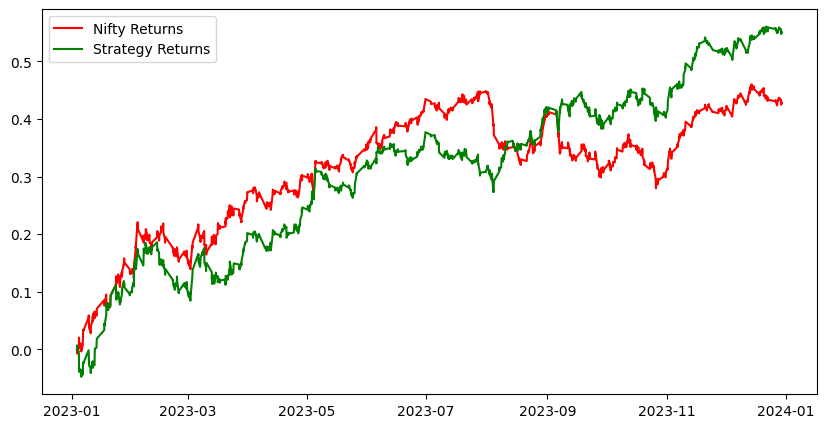

In [104]:
from sklearn.impute import SimpleImputer

predicted_signal = model.predict(X_imputed)

# เพิ่มคอลัมน์ Predicted_Signal ใน DataFrame
df['Predicted_Signal'] = predicted_signal

# คำนวณผลตอบแทนของ Nifty
df['Nifty_returns'] = np.log(df['Close'] / df['Close'].shift(1))
Cumulative_Nifty_returns = np.cumsum(df['Nifty_returns'])  # ต้องกำหนด split ตามที่เหมาะสม

# คำนวณผลตอบแทนของกลยุทธ์
df['Strategy_returns'] = df['Nifty_returns'] * df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df['Strategy_returns'])  # ต้องกำหนด split ตามที่เหมาะสม

# พล็อตกราฟ
plt.figure(figsize=(10,5))
plt.plot(Cumulative_Nifty_returns, color='r',label = 'Nifty Returns')  # ปรับชื่อรายการให้เป็น 'Nifty Returns'
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')  # ปรับชื่อรายการให้เป็น 'Strategy Returns'
plt.legend()
plt.show()


In [105]:
samsung = yf.Ticker('MSFT')
interval = '1h'
start = '2023-1-1'
end = '2023-12-31'
df1 = samsung.history(interval=interval,start=start,end=end)
df1.drop(columns=['Volume', 'Dividends', 'Stock Splits'], inplace=True)
df1

,Open,High,Low,Close
Datetime,,,,
2023-01-03 09:30:00-05:00,243.080002,245.750000,239.340103,239.788101
2023-01-03 10:30:00-05:00,239.800003,239.830002,237.500000,238.360001
2023-01-03 11:30:00-05:00,238.369995,238.690002,237.500000,238.150101
2023-01-03 12:30:00-05:00,238.179993,238.990005,237.399994,238.440002
2023-01-03 13:30:00-05:00,238.449997,238.949997,238.050003,238.550003
...,...,...,...,...
2023-12-29 11:30:00-05:00,373.589996,374.640015,373.480011,373.690002
2023-12-29 12:30:00-05:00,373.690002,375.910004,373.630005,375.255005
2023-12-29 13:30:00-05:00,375.230011,376.500000,375.200012,376.043213


In [106]:
df1['S_10'] = df1['Close'].rolling(window=10).mean()
df1['Corr'] = df1['Close'].rolling(window=10).corr(df['S_10'])
df1['RSI'] = ta.RSI(np.array(df1['Close']), timeperiod =10)
df1['Open-Close'] = df1['Open'] - df1['Close'].shift(1)
df1['Open-Open'] = df1['Open'] - df1['Open'].shift(1)

X1 = df1.iloc[:,:9]

In [107]:
y1 = np.where(df1['Close'].shift(-1) > df1['Close'],1,-1)

In [108]:
split = int(0.7*len(df1))
X1_train, X1_test, y1_train, y1_test = X1[:split], X1[split:], y1[:split], y1[split:]

In [109]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# ตรวจสอบและลบข้อมูลที่ไม่เหมาะสม
valid_indices = np.isfinite(X_train).all(axis=1) & np.isfinite(y_train)

X1_train = X_train[valid_indices]
y1_train = y_train[valid_indices]

# แบ่งข้อมูลเป็นชุด train และ test
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_train, y1_train, test_size=0.3, random_state=42)

# สร้างและฝึกโมเดล Logistic Regression
model = LogisticRegression()
model.fit(X1_train, y1_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [110]:
probability1 = model.predict_proba(X1_test)
predicted1 = model.predict(X1_test)
imputer1 = SimpleImputer(strategy='mean')

# แทนที่ค่าที่หายไปใน X ด้วยค่าเฉลี่ยของแต่ละคอลัมน์
X1_imputed = imputer.fit_transform(X1)

# ใช้ cross-validation เพื่อประเมินโมเดล
cross_val1 = cross_val_score(LogisticRegression(), X1_imputed, y1, scoring='accuracy', cv=10)
print(cross_val1)
print(cross_val1.mean())


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[0.52       0.44       0.58045977 0.5        0.51149425 0.52298851
 0.5        0.50574713 0.56321839 0.54597701]
0.5189885057471264


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


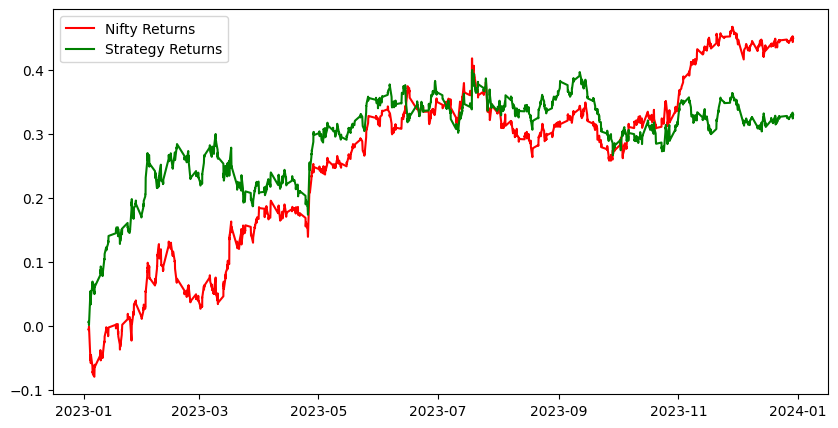

In [111]:
predicted_signal1 = model.predict(X_imputed)
df1['Predicted_Signal1'] = predicted_signal1

# คำนวณผลตอบแทนของ Nifty
df1['Nifty_returns1'] = np.log(df1['Close'] / df1['Close'].shift(1))
Cumulative_Nifty_returns1 = np.cumsum(df1['Nifty_returns1'])  # ต้องกำหนด split ตามที่เหมาะสม

# คำนวณผลตอบแทนของกลยุทธ์
df1['Strategy_returns1'] = df1['Nifty_returns1'] * df1['Predicted_Signal1'].shift(1)
Cumulative_Strategy_returns1 = np.cumsum(df1['Strategy_returns1'])  # ต้องกำหนด split ตามที่เหมาะสม

# พล็อตกราฟ
plt.figure(figsize=(10,5))
plt.plot(Cumulative_Nifty_returns1, color='r',label = 'Nifty Returns')  # ปรับชื่อรายการให้เป็น 'Nifty Returns'
plt.plot(Cumulative_Strategy_returns1, color='g', label = 'Strategy Returns')  # ปรับชื่อรายการให้เป็น 'Strategy Returns'
plt.legend()
plt.show()


# เทียบระหว่าง Apple Stock และ Microsoft  Stock
# และราคาpredic

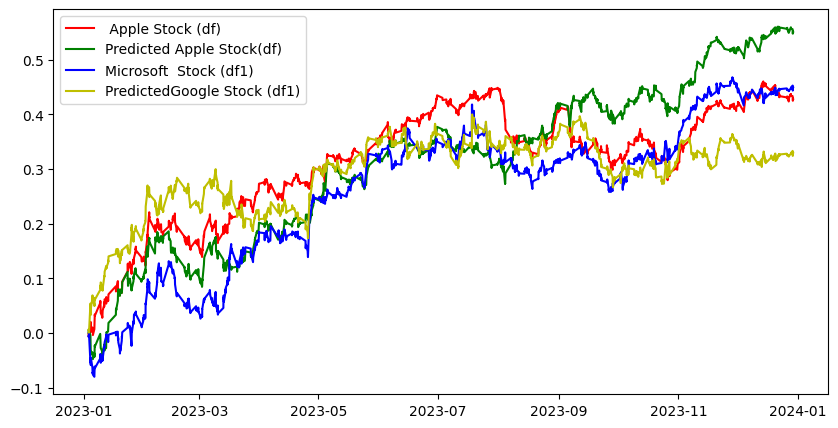

In [112]:
plt.figure(figsize=(10,5))

# พล็อตกราฟ Nifty Returns จาก DataFrame df
plt.plot(Cumulative_Nifty_returns, color='r', label=' Apple Stock (df)')

# พล็อตกราฟ Strategy Returns จาก DataFrame df
plt.plot(Cumulative_Strategy_returns, color='g', label='Predicted Apple Stock(df)')

# พล็อตกราฟ Nifty Returns จาก DataFrame df1
plt.plot(Cumulative_Nifty_returns1, color='b', label='Microsoft  Stock (df1)')

# พล็อตกราฟ Strategy Returns จาก DataFrame df1
plt.plot(Cumulative_Strategy_returns1, color='y', label='PredictedMicrosoft Stock (df1)')

plt.legend()
plt.show()


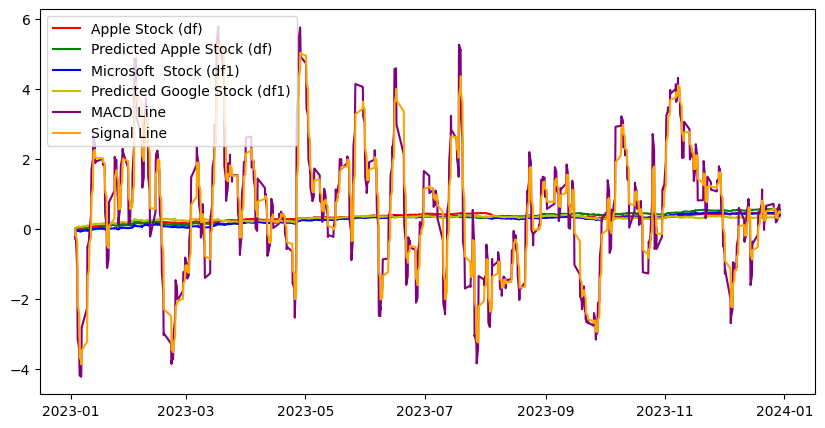

In [113]:
# Compute MACD for both stocks
# Assuming you have the necessary data for calculating MACD (e.g., Close prices)
# You can use the pandas `ewm` function to compute the exponential moving averages

# Compute Short-term Exponential Moving Average (EMA)
short_ema = df1['Close'].ewm(span=12, adjust=False).mean()

# Compute Long-term Exponential Moving Average (EMA)
long_ema = df1['Close'].ewm(span=26, adjust=False).mean()

# Compute MACD line
macd_line = short_ema - long_ema

# Compute Signal line (9-day EMA of MACD)
signal_line = macd_line.ewm(span=9, adjust=False).mean()

# Plot Nifty Returns and Strategy Returns for both stocks along with MACD
plt.figure(figsize=(10,5))

# Plot Nifty Returns from DataFrame df
plt.plot(Cumulative_Nifty_returns, color='r', label='Apple Stock (df)')

# Plot Strategy Returns from DataFrame df
plt.plot(Cumulative_Strategy_returns, color='g', label='Predicted Apple Stock (df)')

# Plot Nifty Returns from DataFrame df1
plt.plot(Cumulative_Nifty_returns1, color='b', label='Microsoft  Stock (df1)')

# Plot Strategy Returns from DataFrame df1
plt.plot(Cumulative_Strategy_returns1, color='y', label='Predicted Google Stock (df1)')

# Plot MACD line
plt.plot(macd_line, color='purple', label='MACD Line')

# Plot Signal line
plt.plot(signal_line, color='orange', label='Signal Line')

plt.legend()
plt.show()


In [113]:
x2=x